Import the necessary libraries

In [2]:
!pip install tensorflow
!pip install shap

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

from imblearn.over_sampling import SMOTE


In [3]:
diab=pd.read_csv("diabetic_data.csv")
diab.head(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diab.info

<bound method DataFrame.info of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  disc

DATA PREPROCESSING AND CLEANING

In [6]:
diab.replace('?', np.nan, inplace=True)

In [7]:
diab.isna().sum()
for i in diab:
    percent=(diab[i].isna().sum()/len(diab))*100
    print(i,"-----",percent)

encounter_id ----- 0.0
patient_nbr ----- 0.0
race ----- 2.2335554114340743
gender ----- 0.0
age ----- 0.0
weight ----- 96.85847925633315
admission_type_id ----- 0.0
discharge_disposition_id ----- 0.0
admission_source_id ----- 0.0
time_in_hospital ----- 0.0
payer_code ----- 39.5574160328597
medical_specialty ----- 49.08220820313268
num_lab_procedures ----- 0.0
num_procedures ----- 0.0
num_medications ----- 0.0
number_outpatient ----- 0.0
number_emergency ----- 0.0
number_inpatient ----- 0.0
diag_1 ----- 0.02063557573256294
diag_2 ----- 0.3517874339170253
diag_3 ----- 1.398305917497003
number_diagnoses ----- 0.0
max_glu_serum ----- 94.74677200636755
A1Cresult ----- 83.27732248491637
metformin ----- 0.0
repaglinide ----- 0.0
nateglinide ----- 0.0
chlorpropamide ----- 0.0
glimepiride ----- 0.0
acetohexamide ----- 0.0
glipizide ----- 0.0
glyburide ----- 0.0
tolbutamide ----- 0.0
pioglitazone ----- 0.0
rosiglitazone ----- 0.0
acarbose ----- 0.0
miglitol ----- 0.0
troglitazone ----- 0.0
tolaz

As per rule of thumb all the columns with more than 10% missing values can be removed, hence we remove the columns:
    1. weight
    2. payer_code
    3.medical_specialty
    4. max_glu_serum
    5.A1Cresult

In [9]:
diab_cleaned=diab.drop(['weight','payer_code','medical_specialty','max_glu_serum','A1Cresult'],axis=1)

In [10]:
diab.shape

(101766, 50)

In [11]:
diab_cleaned.shape

(101766, 45)

In [12]:
diab_cleaned['race'].isna().sum()

2273

In [13]:
for i in diab_cleaned:
    percent=(diab_cleaned[i].isna().sum()/len(diab_cleaned))*100
    print(i,"-----",percent)

encounter_id ----- 0.0
patient_nbr ----- 0.0
race ----- 2.2335554114340743
gender ----- 0.0
age ----- 0.0
admission_type_id ----- 0.0
discharge_disposition_id ----- 0.0
admission_source_id ----- 0.0
time_in_hospital ----- 0.0
num_lab_procedures ----- 0.0
num_procedures ----- 0.0
num_medications ----- 0.0
number_outpatient ----- 0.0
number_emergency ----- 0.0
number_inpatient ----- 0.0
diag_1 ----- 0.02063557573256294
diag_2 ----- 0.3517874339170253
diag_3 ----- 1.398305917497003
number_diagnoses ----- 0.0
metformin ----- 0.0
repaglinide ----- 0.0
nateglinide ----- 0.0
chlorpropamide ----- 0.0
glimepiride ----- 0.0
acetohexamide ----- 0.0
glipizide ----- 0.0
glyburide ----- 0.0
tolbutamide ----- 0.0
pioglitazone ----- 0.0
rosiglitazone ----- 0.0
acarbose ----- 0.0
miglitol ----- 0.0
troglitazone ----- 0.0
tolazamide ----- 0.0
examide ----- 0.0
citoglipton ----- 0.0
insulin ----- 0.0
glyburide-metformin ----- 0.0
glipizide-metformin ----- 0.0
glimepiride-pioglitazone ----- 0.0
metformin-

In [14]:

diab_cleaned.drop(columns=['citoglipton','examide','encounter_id','patient_nbr'],inplace=True)

From the cleaned df diab_cleaned where we removed the columns with too many na values. We see that the columns mentioned below stil have null values:
    race
    diag_1
    diag_2
    diag_3

We have to deal with the missing value imputation of these columns.

Race is a categorical column(we can use mode based imputation), but this might be incorrect as they are NMAR vales as per the dataset based research. SO we replace the np.nan values with Other

Diag_1,Diag_2 and Diag_3 are numerical columns.(We can use mean or median based imputation)-> BUT- We can wee the number of na vales for these columns are very less. Hence we simply drop the rows where we have na values.

In [16]:
diab_cleaned['race'] = diab_cleaned['race'].apply(lambda x: 'Other' if x == '?' else x)

In [17]:
index=[]
index=list(diab_cleaned[diab_cleaned['diag_1']=='?'].index)
index.extend(diab_cleaned[diab_cleaned['diag_2']=='?'].index)
index.extend(diab_cleaned[diab_cleaned['diag_3']=='?'].index)
diab_cleaned.drop(index=index,inplace=True)

Feature Engineering

In [19]:
# Simplify 'readmitted' to binary target
diab_cleaned['readmitted'] = diab_cleaned['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Encode categorical features
cat_cols = diab_cleaned.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    diab_cleaned[col] = le.fit_transform(diab_cleaned[col].astype(str))

In [20]:
len(diab_cleaned[diab_cleaned['readmitted']==1])+len(diab_cleaned[diab_cleaned['readmitted']==0])

101766

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# -------------------------------
# 1. Preprocessing + SMOTE
# -------------------------------
sm = SMOTE(sampling_strategy='minority', random_state=42)
X = diab_cleaned.drop('readmitted', axis=1)
y = diab_cleaned['readmitted']

X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode target for training
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# -------------------------------
# 2. Neural Network Model
# -------------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_cat,
          epochs=20,
          batch_size=64,
          validation_split=0.1)

# -------------------------------
# 3. Model Evaluation
# -------------------------------
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get predicted labels
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate using actual vs predicted
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/20


C:\Users\Harsha S\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2035/2035 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7798 - loss: 0.4557 - val_accuracy: 0.8267 - val_loss: 0.3725
Epoch 2/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8279 - loss: 0.3721 - val_accuracy: 0.8358 - val_loss: 0.3596
Epoch 3/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8355 - loss: 0.3603 - val_accuracy: 0.8422 - val_loss: 0.3531
Epoch 4/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8395 - loss: 0.3549 - val_accuracy: 0.8436 - val_loss: 0.3491
Epoch 5/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8479 - loss: 0.3428 - val_accuracy: 0.8497 - val_loss: 0.3409
Epoch 6/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8505 - loss: 0.3379 - val_accuracy: 0.8487 - val_loss: 0.3414
Epoch 7/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8547 - loss: 0.3298 - val_accuracy: 0.8542 - val_loss: 0.3320
Epoch 8/20
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8585 - loss: 0.3237 - val_accurac

In [22]:
# This should include all features from X
import shap
X_sample_df = pd.DataFrame(X_test[:100], columns=X.columns)

# Check
print("SHAP input shape:", X_sample_df.shape) 

SHAP input shape: (100, 40)


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━

PermutationExplainer explainer:   5%|▌         | 5/100 [00:00<?, ?it/s]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:12<01:16,  1.22it/s]

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:14<01:46,  1.16s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:   9%|▉         | 9/100 [00:15<02:04,  1.37s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:17<02:17,  1.53s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  11%|█         | 11/100 [00:19<02:25,  1.64s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:21<02:28,  1.69s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:23<02:28,  1.71s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:24<02:27,  1.71s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [00:26<02:22,  1.68s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  16%|█▌        | 16/100 [00:28<02:23,  1.70s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  17%|█▋        | 17/100 [00:29<02:20,  1.69s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  18%|█▊        | 18/100 [00:31<02:18,  1.68s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [00:33<02:20,  1.73s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  20%|██        | 20/100 [00:35<02:20,  1.75s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  21%|██        | 21/100 [00:36<02:19,  1.76s/it]

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  22%|██▏       | 22/100 [00:38<02:15,  1.74s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  23%|██▎       | 23/100 [00:40<02:12,  1.72s/it]

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  24%|██▍       | 24/100 [00:42<02:15,  1.79s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  25%|██▌       | 25/100 [00:43<02:12,  1.76s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  26%|██▌       | 26/100 [00:45<02:11,  1.78s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  27%|██▋       | 27/100 [00:47<02:10,  1.78s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [00:49<02:06,  1.75s/it]

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  29%|██▉       | 29/100 [00:50<02:03,  1.74s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  30%|███       | 30/100 [00:52<02:02,  1.75s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  31%|███       | 31/100 [00:54<01:58,  1.72s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  32%|███▏      | 32/100 [00:56<01:59,  1.76s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  33%|███▎      | 33/100 [00:58<01:58,  1.77s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  34%|███▍      | 34/100 [00:59<01:57,  1.77s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [01:01<01:54,  1.76s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  36%|███▌      | 36/100 [01:03<01:54,  1.79s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [01:05<01:52,  1.79s/it]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  38%|███▊      | 38/100 [01:07<01:51,  1.80s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  39%|███▉      | 39/100 [01:08<01:47,  1.76s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  40%|████      | 40/100 [01:10<01:43,  1.72s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  41%|████      | 41/100 [01:11<01:39,  1.69s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [01:13<01:38,  1.70s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  43%|████▎     | 43/100 [01:15<01:38,  1.72s/it]

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [01:16<01:33,  1.67s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  45%|████▌     | 45/100 [01:18<01:31,  1.67s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  46%|████▌     | 46/100 [01:20<01:29,  1.66s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [01:21<01:28,  1.67s/it]

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  48%|████▊     | 48/100 [01:23<01:25,  1.65s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  49%|████▉     | 49/100 [01:25<01:27,  1.71s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  50%|█████     | 50/100 [01:27<01:26,  1.73s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  51%|█████     | 51/100 [01:28<01:24,  1.73s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  52%|█████▏    | 52/100 [01:30<01:23,  1.73s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  53%|█████▎    | 53/100 [01:32<01:20,  1.71s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  54%|█████▍    | 54/100 [01:34<01:18,  1.72s/it]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  55%|█████▌    | 55/100 [01:35<01:16,  1.70s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  56%|█████▌    | 56/100 [01:37<01:15,  1.71s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [01:39<01:13,  1.71s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  58%|█████▊    | 58/100 [01:40<01:11,  1.70s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [01:42<01:12,  1.76s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [01:44<01:10,  1.76s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  61%|██████    | 61/100 [01:46<01:07,  1.74s/it]

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  62%|██████▏   | 62/100 [01:47<01:04,  1.71s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [01:49<01:03,  1.72s/it]

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [01:51<01:03,  1.78s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  65%|██████▌   | 65/100 [01:53<01:02,  1.79s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  66%|██████▌   | 66/100 [01:55<01:01,  1.82s/it]

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  67%|██████▋   | 67/100 [01:56<00:59,  1.79s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [01:58<00:56,  1.75s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [02:00<00:53,  1.73s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


PermutationExplainer explainer:  70%|███████   | 70/100 [02:02<00:52,  1.76s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  71%|███████   | 71/100 [02:03<00:50,  1.75s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  72%|███████▏  | 72/100 [02:05<00:49,  1.76s/it]

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  73%|███████▎  | 73/100 [02:07<00:48,  1.80s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  74%|███████▍  | 74/100 [02:09<00:46,  1.79s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  75%|███████▌  | 75/100 [02:10<00:44,  1.76s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  76%|███████▌  | 76/100 [02:12<00:42,  1.76s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  77%|███████▋  | 77/100 [02:14<00:40,  1.75s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  78%|███████▊  | 78/100 [02:16<00:38,  1.74s/it]

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [02:18<00:37,  1.79s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  80%|████████  | 80/100 [02:19<00:35,  1.77s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [02:21<00:34,  1.79s/it]

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [02:23<00:32,  1.78s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  83%|████████▎ | 83/100 [02:25<00:30,  1.77s/it]

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [02:26<00:27,  1.74s/it]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


PermutationExplainer explainer:  85%|████████▌ | 85/100 [02:28<00:26,  1.79s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  86%|████████▌ | 86/100 [02:30<00:24,  1.78s/it]

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  87%|████████▋ | 87/100 [02:32<00:22,  1.77s/it]

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  88%|████████▊ | 88/100 [02:33<00:20,  1.74s/it]

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  89%|████████▉ | 89/100 [02:35<00:19,  1.74s/it]

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  90%|█████████ | 90/100 [02:37<00:17,  1.70s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  91%|█████████ | 91/100 [02:38<00:15,  1.73s/it]

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [02:40<00:13,  1.71s/it]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  93%|█████████▎| 93/100 [02:42<00:12,  1.74s/it]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [02:44<00:10,  1.74s/it]

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [02:45<00:08,  1.72s/it]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer:  96%|█████████▌| 96/100 [02:47<00:06,  1.73s/it]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [02:49<00:05,  1.72s/it]

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [02:51<00:03,  1.77s/it]

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [02:52<00:01,  1.76s/it]

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer: 100%|██████████| 100/100 [02:54<00:00,  1.76s/it]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


PermutationExplainer explainer: 101it [02:56,  1.84s/it]                         
C:\Users\Harsha S\AppData\Local\Temp\ipykernel_30084\2119042783.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample_df)
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the ne

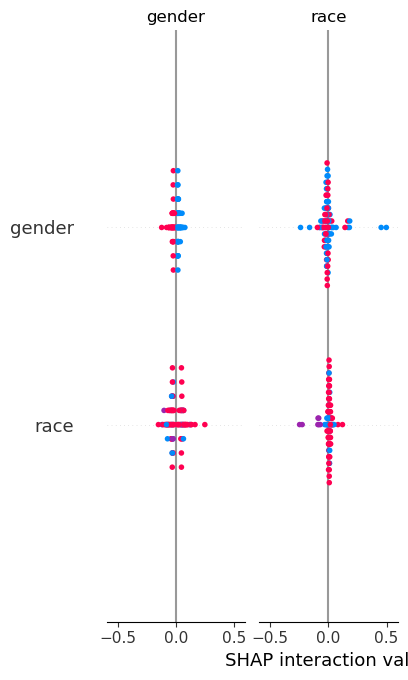

In [23]:
explainer = shap.Explainer(model.predict, X_sample_df)
shap_values = explainer(X_sample_df)
shap.summary_plot(shap_values, X_sample_df)

C:\Users\Harsha S\AppData\Local\Temp\ipykernel_30084\1464419069.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample_df)
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


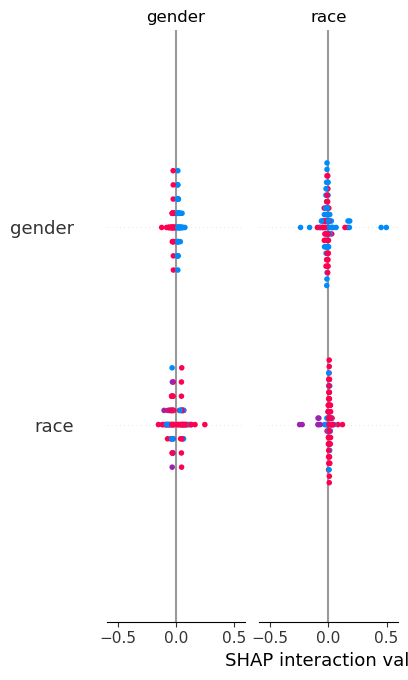

In [24]:
shap.summary_plot(shap_values, X_sample_df)

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        52
           1       0.00      0.00      0.00         8

    accuracy                           0.83        60
   macro avg       0.43      0.48      0.45        60
weighted avg       0.75      0.83      0.79        60


Confusion Matrix:
 [[50  2]
 [ 8  0]]


C:\Users\Harsha S\AppData\Local\Temp\ipykernel_30084\771467614.py:78: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, feature_names=X.columns)
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\Harsha S\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


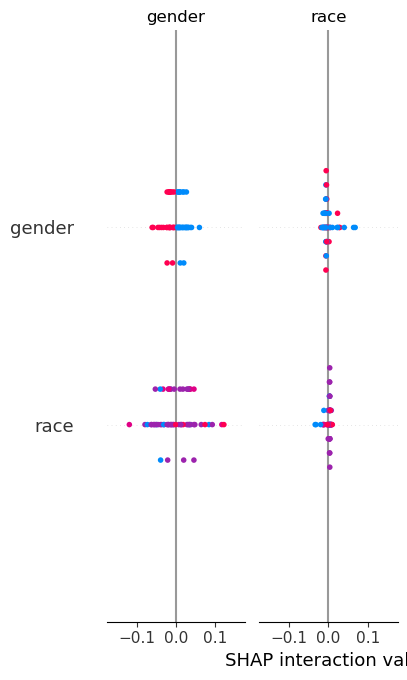

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import shap
import matplotlib.pyplot as plt

# --------------------------
# 1. Load & preprocess data
# --------------------------
df = pd.read_csv("diabetic_data.csv")

# Drop unwanted columns
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
df = df[df['gender'] != 'Unknown/Invalid']
df.dropna(inplace=True)

# Encode target: 1 for <30 (readmitted), else 0
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DataFrames with column names
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# --------------------------
# 2. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# --------------------------
# 3. Train Random Forest
# --------------------------
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model on balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# --------------------------
# 4. Evaluate Model
# --------------------------
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --------------------------
# 5. SHAP Explainability
# --------------------------
# Create a sample for explanation
sample_size = min(100, len(X_test))
X_sample = X_test.sample(sample_size, random_state=42)

# SHAP Explainer
explainer = shap.Explainer(rf, X_sample)

# Disable strict additivity check
shap_values = explainer(X_sample, check_additivity=False)

# Summary plot
shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

In [26]:
# -----------------------------
# 1. Import libraries
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
import matplotlib.pyplot as plt

# -----------------------------
# 2. Load and preprocess data
# -----------------------------
df = pd.read_csv("diabetic_data.csv")

# Drop irrelevant or high-cardinality columns
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

# Remove unknown genders
df = df[df['gender'] != 'Unknown/Invalid']

# Drop rows with missing values
df.dropna(inplace=True)

# Binary encoding for target: readmitted (<30 days = 1, otherwise 0)
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Label encode all categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# -----------------------------
# 3. Split data
# -----------------------------
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)

# -----------------------------
# 4. Train Logistic Regression
# -----------------------------
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]  # For AUC

print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 6. SHAP Explainability
# -----------------------------
# Use KernelExplainer for linear/logistic models
X_sample = X_test.sample(min(100, len(X_test)), random_state=42)

explainer = shap.Explainer(lr, X_sample)
shap_values = explainer(X_sample)

# Summary plot
shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

# Optional: Waterfall plot for one prediction
shap.plots.waterfall(shap_values[0])

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78        53
           1       0.19      0.57      0.29         7

    accuracy                           0.67        60
   macro avg       0.56      0.63      0.53        60
weighted avg       0.84      0.67      0.72        60

Confusion Matrix:
 [[36 17]
 [ 3  4]]
ROC AUC Score: 0.477088948787062


NameError: name 'sns' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1.Import data set
# ------------------------------
np.random.seed(42)
n_samples = 1000
data = df = pd.read_csv("diabetic_data.csv")
# ------------------------------
# 2. Preprocessing
# ------------------------------
df = data.drop(['encounter_id', 'patient_nbr'], axis=1)
df = df[df['gender'] != 'Unknown/Invalid']
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, stratify=y, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ------------------------------
# 3. Train XGBoost model
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred = xgb.predict(X_test)

# ------------------------------
# 4. Evaluation Metrics
# ------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------
# 5. SHAP Explainability
# ------------------------------
X_sample = X_test.sample(min(100, len(X_test)), random_state=42)
explainer = shap.Explainer(xgb, X_sample)
shap_values = explainer(X_sample)

# SHAP summary plot
shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

shap.plots.waterfall(shap_values[0])